# Support Vector Machines 
## SVM - Classification

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**Overall goal is to use the wine dataset to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

---
---

### Importing Dependencies

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [12]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9.8   Legit  red  
3      9.8   Legit  red  
4      9.4   Legit  red

**What are the unique variables in the target column we are trying to predict (quality)?**

In [14]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**A countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

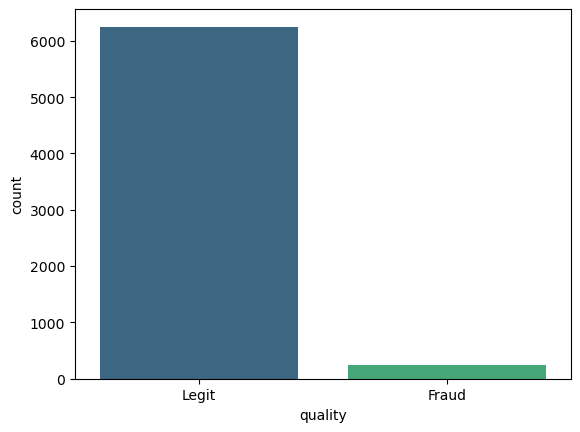

In [16]:
sns.countplot(x=df['quality'], palette = 'viridis');

It is clear that the target label (classes) are imbalanced and it is understood because fraudalent happens to be very less as compared to normal distribution of legit wine.

**Let's find out if there is a difference between red and white wine when it comes to fraud. Here is a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<Axes: xlabel='type', ylabel='count'>

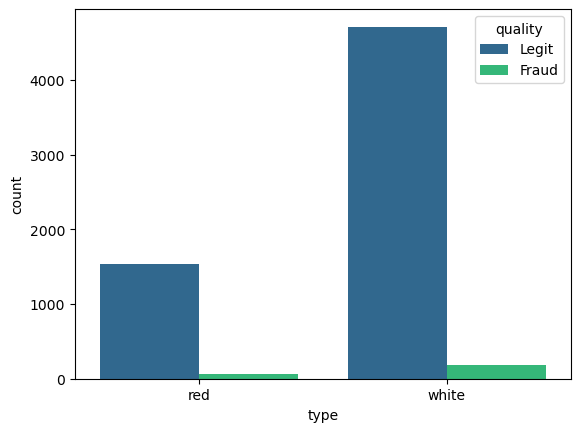

In [19]:
sns.countplot(x = df['type'], hue = df['quality'], palette = 'viridis', saturation = 1)

**What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [21]:
red_wine = df[df['type'] == 'red']
np.round(
    (len(red_wine[red_wine['quality'] == 'Fraud'])/len(red_wine)) * 100, 
        2)

3.94

In [22]:
white_wine = df[df['type'] == 'white']
np.round(
    (len(white_wine[white_wine['quality'] == 'Fraud'])/len(white_wine)) * 100, 
        2)

3.74

**Calculating the correlation between the various features and the "quality" column. To do this we need to map the column to 0 and 1 instead of a string.**
##### One-Hot Encoding to derive numerically labelled column based on Legit and Fraud cases

In [24]:
df['Fraud'] = df['quality'].map({'Legit': 0, 'Fraud' : 1})
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  Fraud  
0      9.4   Legit  red      0  
1      9.8   Legit  red      0  
2      9.8   Legit  red      0  
3      9.8   Legit  red      0  
4      9.4   Legit  red      0

In [25]:
correlation_table = df.corr(numeric_only = True)['Fraud'].sort_values()
correlation_table.drop("Fraud", inplace = True)

The most correlated feature is 'volatile acidity' that states, if any increase in this feature is encountered, we may say that wine is fraudalent

**A bar plot of the correlation values to Fraudlent wine.**

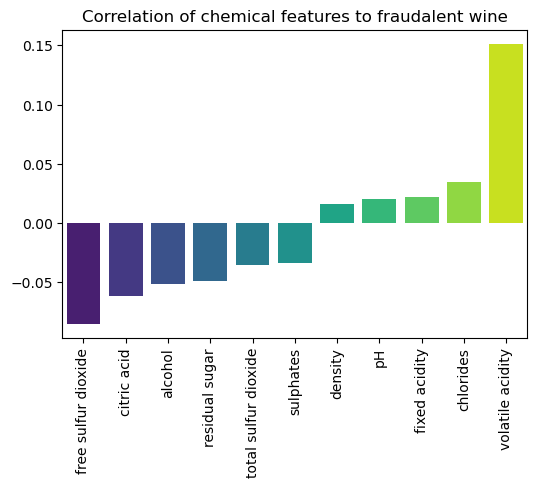

In [28]:
plt.figure(figsize = (6,4))
sns.barplot(x = correlation_table.index, y = correlation_table.values, palette = 'viridis', saturation = 1)
plt.xlabel("")
plt.title("Correlation of chemical features to fraudalent wine")
plt.xticks(rotation = 'vertical');

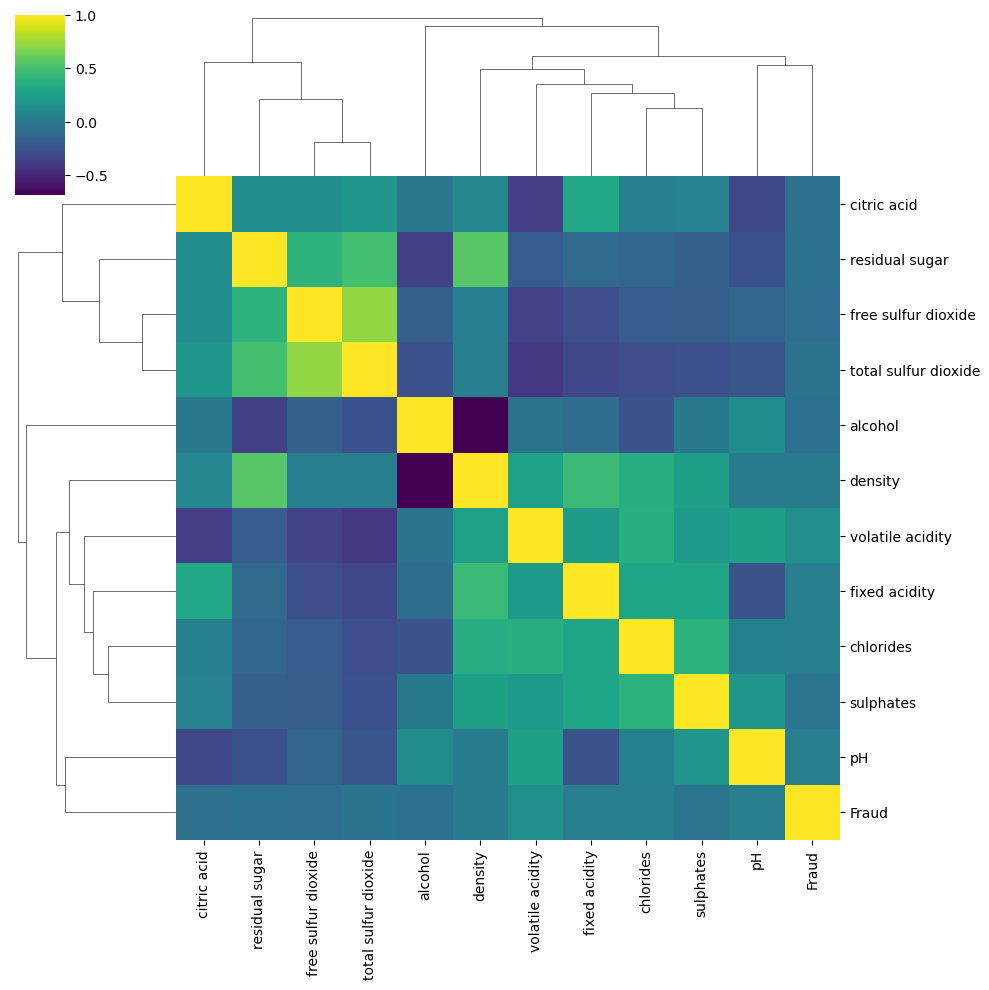

In [30]:
sns.clustermap(df.corr(numeric_only=True), cmap = 'viridis')

----
## Machine Learning Model

**Converting the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [32]:
df['white_wine'] = df['type'].map({'red' : 0, 'white' : 1})
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  Fraud  white_wine  
0      9.4   Legit  red      0           0  
1      9.8   Legit  red      0           0  
2      9.8   Legit  red      0           0  
3      9.8   Legit  red      0           0  
4      9.4   Legit  red      0           0

#### Train | Test and Feature Scaling

In [34]:
X = df.drop(["quality", "type", "Fraud"], axis = 1)
y = df['quality']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**We already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data.**

In [40]:
from sklearn.svm import SVC

In [41]:
svc = SVC(class_weight = 'balanced')
param_grid = {
    'C' : [0.001, 0.01, 0.1, 0.02, 0.5, 1], 
    'gamma' : ['scale', 'auto']
}

Performing GridSearchCV to run a grid search for the best C and gamma parameters.

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid_model = GridSearchCV(svc, param_grid, cv = 5)
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.02, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [45]:
grid_model.best_params_

{'C': 1, 'gamma': 'auto'}

#### Model Evaluation 
Displaying confusion matrix and classification report.

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
y_pred = grid_model.predict(scaled_X_test)

In [49]:
confusion_matrix(y_test, y_pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



### Conclusion

Realistically, detecting frauds based on chemical structures may not be optimum enough. Although, properties like labels, sold wines from store or other properties can help even better. Talking about how model performed, then the accuracy on fraud cases is still a challenge as 17 out of 27 were detected on the basis of training dataset. So, I wouldn't highly encourage while going with a model that is, prepared on the basis of provided chemical structure dataset. 

Process of wine/alcohol creation includes grape fermentation which does includes the chemical structures. Although, selling it at higher prices still doesn't makes that chemical structures are badly used. The concern is about selling it at higher prices, so attributes like label, stores, distributors and data associated with their processes does makes more sense to understand the 'fraudalent' detection.

----